In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
netflix_dataset= pd.read_csv('combined_data_1.txt', encoding= 'latin1' ,header= None, usecols= [0,1], names= ['Cust_Id', 'Rating'])
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [3]:
netflix_dataset.shape

(24058263, 2)

In [4]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [5]:
movie_count= netflix_dataset.isnull().sum()[1]
movie_count

4499

In [6]:
cust_count= netflix_dataset['Cust_Id'].nunique()- movie_count
cust_count

470758

In [7]:
rating_count= netflix_dataset['Cust_Id'].count()- movie_count

In [8]:
rating_plot = netflix_dataset.groupby(['Rating'])['Rating'].agg(['count'])
rating_plot

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


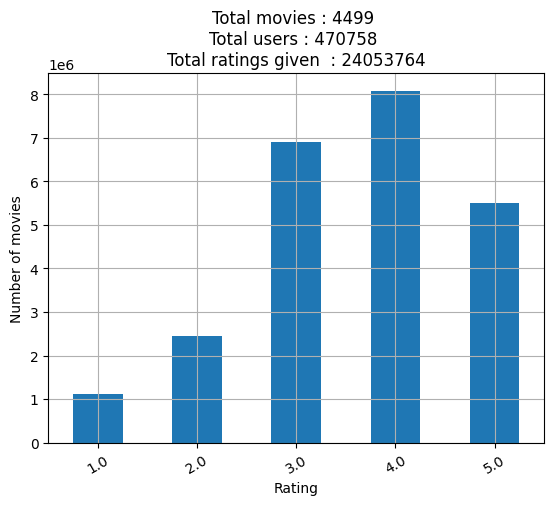

In [9]:
rating_plot.plot(kind= 'bar', legend= False)
plt.xlabel('Rating')
plt.ylabel('Number of movies')
plt.title(f'Total movies : {movie_count} \nTotal users : {cust_count} \nTotal ratings given  : {rating_count}')
plt.grid()
plt.xticks(rotation = 30)
plt.show()

In [10]:
df_nan= pd.DataFrame(pd.isnull(netflix_dataset['Rating']))
df_nan= df_nan[df_nan['Rating']== True]
df_nan.reset_index(inplace= True)
df_nan

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


# ASSIGNING MOVIE ID'S

In [16]:
movie_id= 1
movie_np = []

for i , j in zip(df_nan['index'][1:], df_nan['index'][:-1]):
    temp= np.full((1, i-j-1), movie_id)
    movie_np= np.append(movie_np, temp)
    movie_id +=1
    

In [17]:
print(movie_id)
print(movie_np.shape)

4499
(24053336,)


In [18]:
last_record= np.full((1, len(netflix_dataset)-df_nan.iloc[-1,0]-1), movie_id)
movie_np= np.append(movie_np, last_record)
print(movie_np.shape)

(24053764,)


In [19]:
netflix_dataset= netflix_dataset[pd.notnull(netflix_dataset['Rating'])]
netflix_dataset

,Cust_Id,Rating
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
5,823519,3.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [20]:
netflix_dataset['Movie_Id']= movie_np.astype(int)
netflix_dataset.head()

C:\Users\R.Yeshasvin\AppData\Local\Temp\ipykernel_27392\1391442996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Movie_Id']= movie_np.astype(int)


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [21]:
netflix_dataset['Cust_Id']= netflix_dataset['Cust_Id'].astype(int)

C:\Users\R.Yeshasvin\AppData\Local\Temp\ipykernel_27392\3434585833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Cust_Id']= netflix_dataset['Cust_Id'].astype(int)


# DATA CLEANING

In [22]:
f = ['count', 'mean']

In [23]:
movie_summary= netflix_dataset.groupby(['Movie_Id'])['Movie_Id'].agg(f)
movie_benchmark= round(movie_summary['count'].quantile(0.7),0)
print(f'Minimum number of ratings required for a movie to be considered : {movie_benchmark}')

Minimum number of ratings required for a movie to be considered : 1799.0


In [24]:
cust_summary= netflix_dataset.groupby(['Cust_Id'])['Rating'].agg(f)
cust_benchmark = round(cust_summary['count'].quantile(0.7),0)
print(f'Mimimum number rating to be given by a user for the user to be considered : {cust_benchmark}')

Mimimum number rating to be given by a user for the user to be considered : 52.0


In [25]:
drop_movie_list= movie_summary[movie_summary['count'] < movie_benchmark].index
drop_movie_list

Int64Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
            ...
            4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
           dtype='int64', name='Movie_Id', length=3149)

In [26]:
drop_cust_list= cust_summary[cust_summary['count'] < cust_benchmark].index
drop_cust_list

Int64Index([      8,      10,      25,      33,      42,      59,      83,
                 87,      94,     116,
            ...
            2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401,
            2649404, 2649409, 2649421],
           dtype='int64', name='Cust_Id', length=327300)

In [27]:
netflix_dataset= netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]
netflix_dataset= netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]
netflix_dataset.shape

(17337458, 3)

# LOADING THE MOVIES DATASET

In [28]:
movie_titles= pd.read_csv('movie_titles _1_ (2) (2).csv', encoding= 'latin1', usecols= [0,1,2,], names= ['Movie_Id', 'Year', 'Name'], header= None)
movie_titles

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17764,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17765,17767,2004.0,Fidel Castro: American Experience
17766,17768,2000.0,Epoch
17767,17769,2003.0,The Company


In [29]:
movie_titles.set_index('Movie_Id', inplace= True)
movie_titles.head()

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


In [31]:
import math 
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [32]:
reader= Reader()
svd= SVD()

In [33]:
data= Dataset.load_from_df(netflix_dataset[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)

In [34]:
cross_validate(svd, data, measures= ['RMSE', 'MAE'], verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9962  1.0003  0.9983  0.9996  0.9936  0.9976  0.0024  
MAE (testset)     0.8066  0.8020  0.8014  0.8021  0.7933  0.8011  0.0043  
Fit time          1.10    1.08    1.22    1.14    1.20    1.15    0.06    
Test time         0.14    0.13    0.14    0.12    0.12    0.13    0.01    


{'test_rmse': array([0.99617222, 1.00027631, 0.99834016, 0.99962174, 0.99358232]),
 'test_mae': array([0.80658536, 0.80201985, 0.80140079, 0.8020503 , 0.79333136]),
 'fit_time': (1.095959186553955,
  1.0786337852478027,
  1.224348783493042,
  1.1406686305999756,
  1.1959693431854248),
 'test_time': (0.14386510848999023,
  0.1261591911315918,
  0.14118242263793945,
  0.12021017074584961,
  0.1164853572845459)}

# BUILDING A RECOMMENDATION SYSTEM FOR A SINGLE USER 

In [36]:
dataset_712664= netflix_dataset[(netflix_dataset['Cust_Id']==712664) & (netflix_dataset['Rating']== 5)]
dataset_712664 = dataset_712664.set_index('Movie_Id')
dataset_712664

,Cust_Id,Rating
Movie_Id,,
3,712664,5.0
79,712664,5.0
175,712664,5.0
199,712664,5.0
241,712664,5.0
...,...,...
3887,712664,5.0
4109,712664,5.0
4266,712664,5.0


In [37]:
dataset_712664= dataset_712664.join(movie_titles)['Name']
dataset_712664

Movie_Id
3                       Character
79                    The Killing
175                Reservoir Dogs
199               The Deer Hunter
241            North by Northwest
                  ...            
3887    Aguirre: The Wrath of God
4109              American Psycho
4266    The Passion of the Christ
4384             Dawn of the Dead
4392             Army of Darkness
Name: Name, Length: 84, dtype: object

In [35]:
user_712664= movie_titles.copy()
user_712664.reset_index(inplace=True)
user_712664= user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]
user_712664

,Movie_Id,Year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17764,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17765,17767,2004.0,Fidel Castro: American Experience
17766,17768,2000.0,Epoch
17767,17769,2003.0,The Company


In [39]:
data = Dataset.load_from_df(netflix_dataset[['Cust_Id', 'Movie_Id', 'Rating']], reader)
train_set = data.build_full_trainset()
svd.fit(train_set)

In [40]:
user_712664['Estimate_Score'] = user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)

In [46]:
user_712664 = user_712664.sort_values('Estimate_Score', ascending=False)
user_712664.head(10)

,Movie_Id,Year,Name,Estimate_Score
2101,2102,1994.0,The Simpsons: Season 6,5.000000
4359,4360,1996.0,Mr. Show: Season 2,5.000000
3661,3662,1994.0,House of Cards Trilogy II: To Play the King,5.000000
4184,4185,1989.0,The Kids in the Hall: Season 1,5.000000
871,872,1954.0,Seven Samurai,5.000000
560,561,1963.0,High and Low,5.000000
174,175,1992.0,Reservoir Dogs,5.000000
4053,4054,1990.0,House of Cards Trilogy I: House of Cards,5.000000
3289,3290,1974.0,The Godfather,5.000000
721,722,2003.0,The Wire: Season 1,4.987757


In [70]:
user_list= []
for id in netflix_dataset['Cust_Id']:
    user_list.append(id)

In [102]:
def movie_recommender():
    i= int(input("Please enter a user ID to view recommendations : "))
    if i in user_list:
        user_recommendation=  movie_titles.copy()
        user_recommendation.reset_index(inplace= True)
        user_recommendation= user_recommendation[~user_recommendation['Movie_Id'].isin(drop_movie_list)]
    
    
        user_recommendation['Estimate_score']= user_recommendation['Movie_Id'].apply(lambda x : svd.predict(i, x).est)
    
    
        user_recommendation.sort_values(by= 'Estimate_score', ascending= False, inplace= True)
        user_recommendation=user_recommendation.drop(columns=["Movie_Id"], axis= 1)
    
        return user_recommendation.head(10)
    

    else:
        print('Please enter a valid username ! : ')
        
        x= input('Do you want to go again (Y\\N)')
        if x == 'Y' or x =='y':
            return movie_recommender()
        else:
            print('')
    
   

In [104]:
movie_recommender()

Please enter a user ID to view recommendations : 44937


,Year,Name,Estimate_score
1993,2005.0,The L Word: Season 2,4.751299
2584,1994.0,Absolutely Fabulous: Series 2,4.715068
3289,1974.0,The Godfather,4.539814
240,1959.0,North by Northwest,4.531103
962,1951.0,A Streetcar Named Desire,4.530536
871,1954.0,Seven Samurai,4.530181
4352,2002.0,Curb Your Enthusiasm: Season 3,4.525596
1475,2004.0,Six Feet Under: Season 4,4.522166
3455,2004.0,Lost: Season 1,4.508601
721,2003.0,The Wire: Season 1,4.505003


In [106]:
movie_recommender()

Please enter a user ID to view recommendations : 26430291
Please enter a valid username ! : 
Do you want to go again (Y\N)y
Please enter a user ID to view recommendations : 2643029


,Year,Name,Estimate_score
1864,2004.0,Eternal Sunshine of the Spotless Mind,4.743912
2447,1991.0,Prime Suspect 1,4.663777
3455,2004.0,Lost: Season 1,4.645306
871,1954.0,Seven Samurai,4.639691
1475,2004.0,Six Feet Under: Season 4,4.628735
570,1999.0,American Beauty,4.609999
67,2004.0,Invader Zim,4.609538
404,1987.0,Wings of Desire,4.604481
3370,2003.0,Whale Rider,4.534835
240,1959.0,North by Northwest,4.515816
